## ESTANDARIZACION

---

In [72]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,15) 

In [73]:
df= pd.read_csv('../files/endesarrollo_normalizar.csv', index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


---

### 1) Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [74]:
numericas= df.select_dtypes(np.number)#Seleccionamos solo las variables numericas

numericas.drop(columns=['life_expectancy','year'],axis=1,inplace=True)#Eliminamos la variable respuesta y la columna year

In [75]:
numericas.shape

(2410, 14)

In [76]:
numericas.columns

Index(['adult_mortality', 'infant_deaths', 'alcohol', 'measles', 'bmi',
       'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'thinness__1-19_years', 'income_composition_of_resources', 'schooling',
       'life_box'],
      dtype='object')

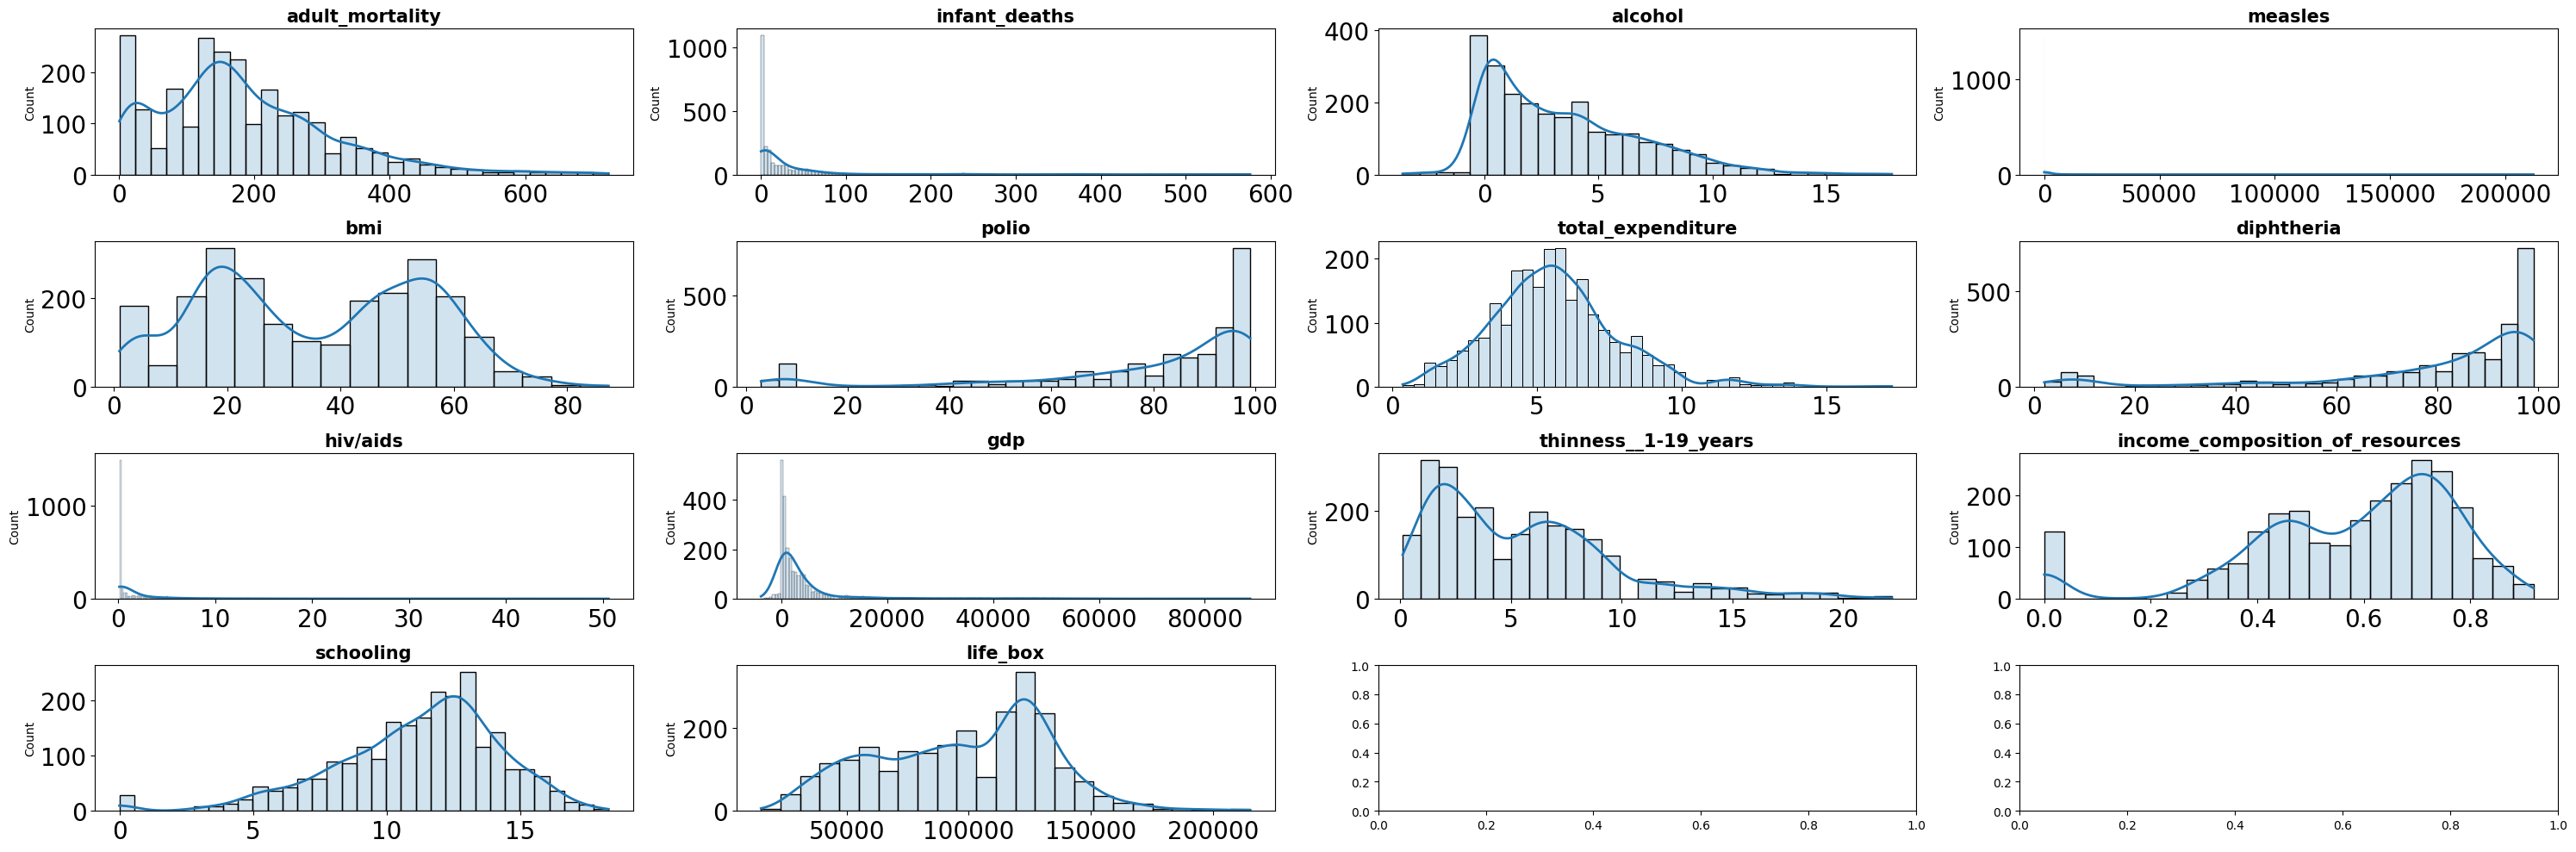

In [77]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

`Debido a la cantidad de outliers qu tenemos en el dataframe hemos decidido aplicar el metodo RobustScaler para estandarizar las variables predictoras, ya que el mismo reduce los efectos de esos valores extremos.`

In [78]:
robust = RobustScaler()

In [79]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [80]:
x_robust= robust.transform(numericas)

In [81]:
numericas_robust= pd.DataFrame(x_robust,columns=numericas.columns)

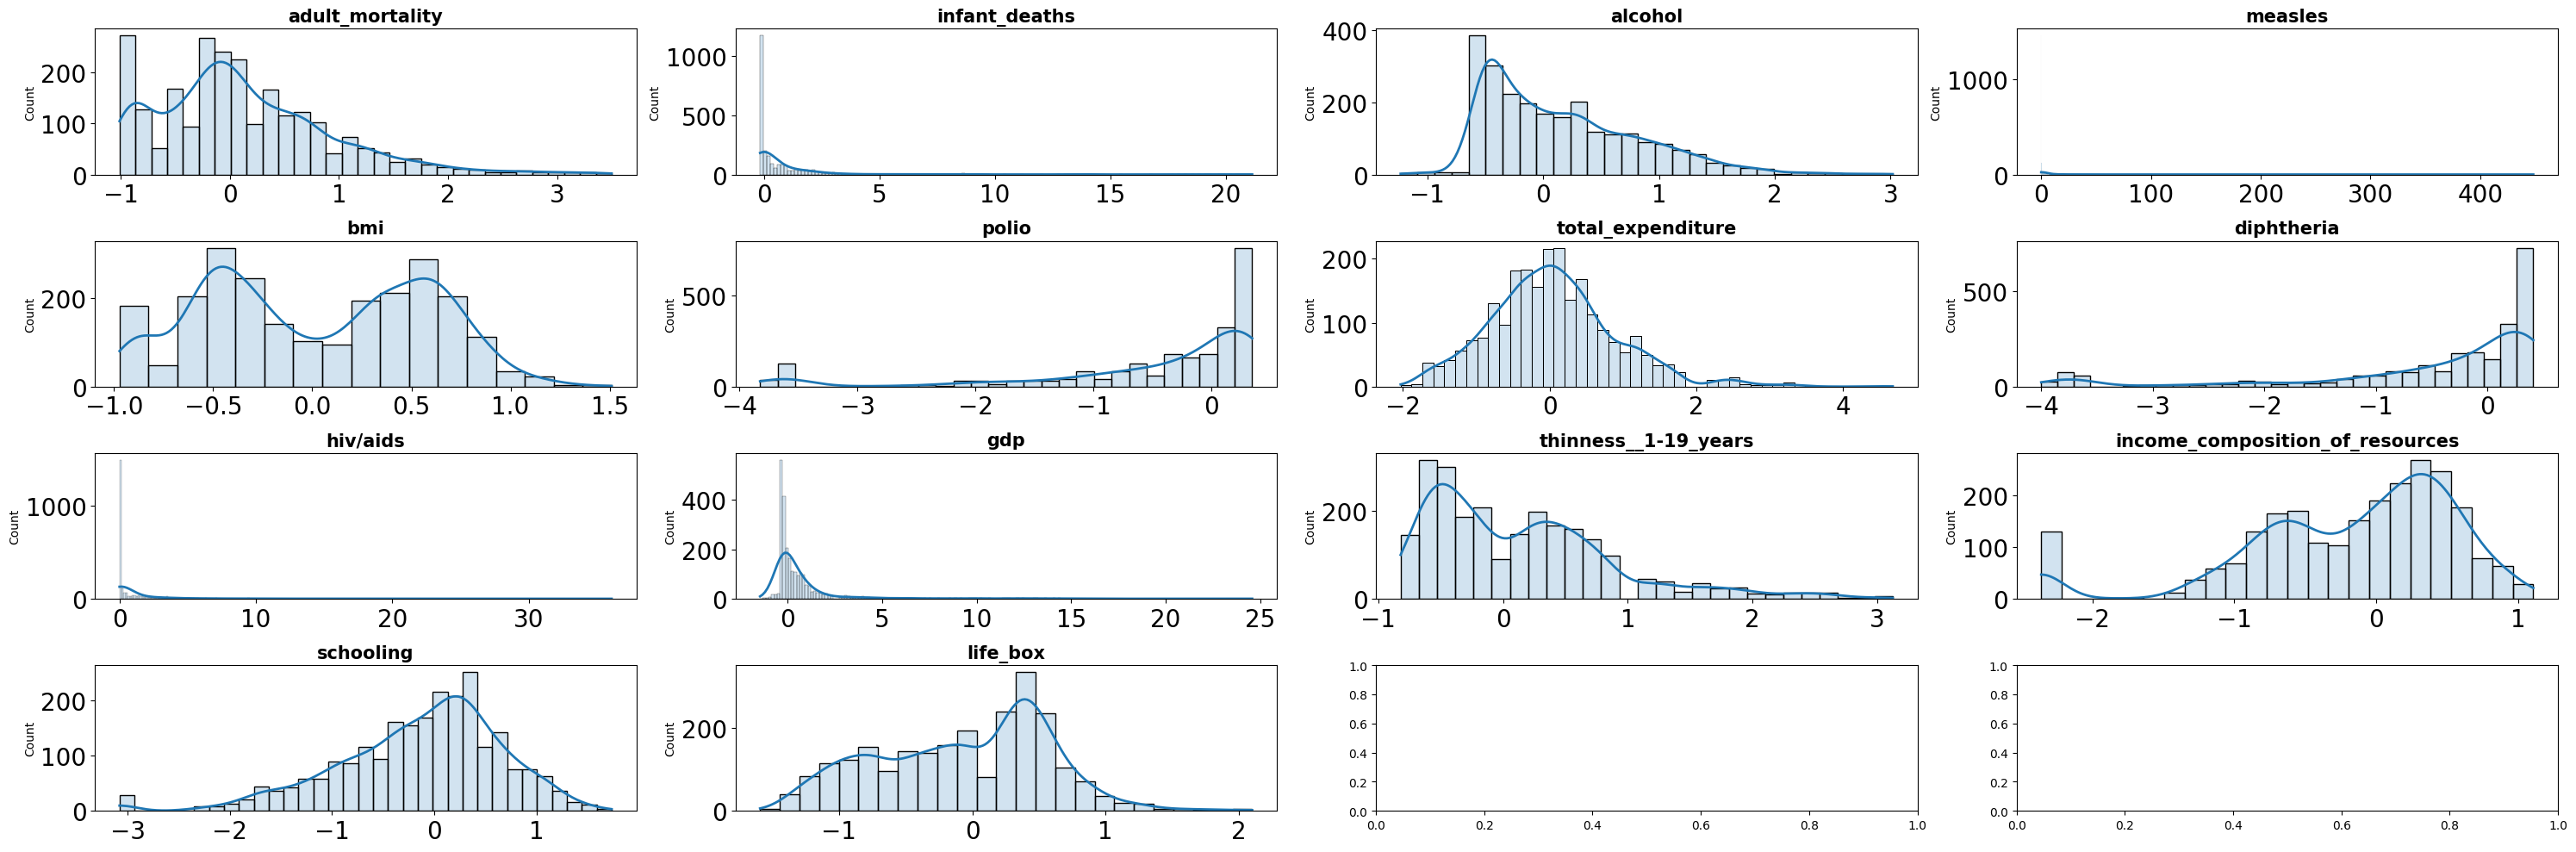

In [82]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

`Vemos que las escalas de las diferentes variables se han estandarizado.`

---

In [83]:
df.head()

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_box
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,84427.566715
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,66186.863883
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,430.0,18.1,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,66186.863883
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,2787.0,17.6,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,64878.902139
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,3013.0,17.2,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,63909.280700


In [84]:
numericas_robust.shape


(2410, 14)

`Vamos a crear el dataframe con las columnas estandarizadas.`

In [85]:
columnas_robust=numericas_robust.columns

In [86]:
df.drop(columnas_robust, axis = 1, inplace = True)

In [87]:
df[columnas_robust] = numericas_robust[columnas_robust]

In [88]:
df.head()

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_box
0,Afghanistan,Developing,Asia,2015.0,65.0,0.62500,2.111111,-0.519069,2.402536,-0.451474,-3.695652,1.067594,-1.136364,0.0,-0.219529,2.232143,-0.553352,-0.421053,-0.310891
1,Afghanistan,Developing,Asia,2014.0,59.9,0.67500,2.185185,-0.519069,1.003698,-0.465852,-1.434783,1.075547,-1.272727,0.0,-0.211517,2.285714,-0.564684,-0.447368,-0.646949
2,Afghanistan,Developing,Asia,2013.0,59.9,0.65625,2.259259,-0.519069,0.872689,-0.480230,-1.260870,1.055666,-1.181818,0.0,-0.206150,2.321429,-0.587347,-0.473684,-0.646949
3,Afghanistan,Developing,Asia,2012.0,59.5,0.68125,2.370370,-0.519069,5.853143,-0.494608,-1.043478,1.210736,-1.045455,0.0,-0.195384,2.357143,-0.613787,-0.500000,-0.671046
4,Afghanistan,Developing,Asia,2011.0,59.2,0.70000,2.444444,-0.519069,6.330692,-0.506111,-1.000000,0.952286,-1.000000,0.0,-0.366237,2.410714,-0.647781,-0.578947,-0.688910


---

### 2) Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings


In [89]:
df.to_csv('../files/endesarrollo_estandarizado.csv')